<h5>Libraries Import</h5>

In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox
import time

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Train/Test splitting
from sklearn.model_selection import train_test_split

# Models evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Hyperparameters tuning
from sklearn.model_selection import RandomizedSearchCV

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Decomposition
from sklearn.decomposition import PCA

# Pipeline
from sklearn.pipeline import Pipeline

# Get multiple outputs from one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Ignore the warning messages
import warnings
warnings.filterwarnings('ignore')

#### Uploading and checking the data
<h6>
Plan:<br><br>
<ul>
<li>Upload the data;</li><br>
<li>Check the shape and the columns' names of the dataset;</li><br>
<li>Check for nulls, NaN and duplicates;</li><br>
<li>Retrieve some descriptive statistics;</li><br>
<li>Look at the dataset.</li><br>
</ul>
First, we upload the train and the `test` datasets.<br>We will also define variables for the `test_ids` and the lenght for the `train` dataset to divide the train and the test datasets again before modeling.

We concatenate the datasets to transform the data in both of the datasets simultaneously.
</h6>

In [2]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")
df_submission = pd.read_csv("../data/sample_submission.csv")

print(f"Train data: {df_train.shape} \nTest data: {df_test.shape}, \nSubmission data: {df_submission.shape}")
df_train

Train data: (19219, 35) 
Test data: (12814, 28), 
Submission data: (12814, 8)


,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


In [3]:
test_ids = df_test["id"]
df_len = len(df_train)
df = pd.concat([df_train, df_test], ignore_index=True)
df_test

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,19221,1358,1372,117715,117724,289,36,32,29386,101,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,19222,158,168,232415,232440,80,10,11,8586,107,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,19223,559,592,544375,544389,140,19,15,15524,103,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12809,32028,1101,1116,447943,447992,313,32,37,21603,79,...,0.0126,0.4063,0.9194,1.0,2.4955,1.2305,1.6335,0.7661,-0.3109,0.8894
12810,32029,1289,1306,3149494,3149542,59,9,18,5249,113,...,0.0052,0.7778,1.0000,1.0,1.7708,0.8451,1.2553,0.7222,-0.0448,0.1954
12811,32030,41,210,1587535,1587191,16584,796,522,1858162,24,...,0.1236,0.2199,0.4097,0.0,4.2525,2.2504,2.2672,-0.0629,-0.0801,1.0000
12812,32031,1329,1340,702237,702267,386,43,34,36875,66,...,0.0095,0.2407,1.0000,1.0,2.5866,1.1139,1.5911,0.8461,-0.2629,0.7844


<h6>From <b>descriptive statistics</b>, we observe:

<ul>
<li>the joint dataset contains of 35 columns, 7 of them are the defects we should predict;</li>
<li>there're 32033 rows in the dataset, so the dataset is large enough to apply some complex models;</li>
<li>all the values are numeric - no need for categorization;</li>
<li>there're no null and NaN values in the train dataset, only in test dataset;</li>
<li>we have 12814 values to predict;</li>
<li>the columns <b>Pixels_Areas, X_Perimeter, Y_Perimeter, Sum_of_Luminosity</b> - max values of these columns considerably differ from the mean which points to the outliers;</li>
<li>the dataset contains id column that should be dropped before training;</li>
<li>no duplicates in the dataset</li>
</ul>
</h6>

In [4]:
df = df.drop(columns=['id'])
pd.set_option('display.max_columns', None)
print('--------------')
print('Rows, Columns:')
df.shape
print('---------------')
print("Columns' names:")
df.columns
print('-----------------')
print('Column - Datatype:')
df.dtypes
df.head(10)
print('---------------------')
print('Descriptive statistic:')
df_train.describe().T.style.background_gradient(cmap="Oranges").format("{:.2f}")
print('-----------------------')
print('The sum of null values:')
print(df.isnull().sum())
print('-----------------------')
print('The sum of NaN values:')
df.isna().sum()
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicate rows:", num_duplicates)

--------------
Rows, Columns:


(32033, 34)

---------------
Columns' names:


Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

-----------------
Column - Datatype:


X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
TypeOfSteel_A300           int64
TypeOfSteel_A400           int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
Pastry                   float64
Z_Scratch                float64
K_Scatch                 float64
Stains    

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,1009,1033,899231,899307,409,22,26,47513,86,118,1650,1,0,70,0.2761,0.4136,0.4091,0.0053,0.5454,1.0000,1.0,2.6117,0.9542,1.4150,0.5909,-0.1890,0.8749,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,596,607,739072,7390760,204,21,21,22478,89,127,1373,0,1,40,0.8331,0.2744,0.6842,0.0110,0.7143,1.0000,1.0,2.3096,1.1761,1.3222,0.3158,-0.1497,0.5212,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1673,1687,294065,294091,571,38,57,53142,77,110,1692,0,1,300,0.1491,0.4326,0.9643,0.0142,0.5686,0.7179,1.0,2.7528,1.3802,1.7559,0.0357,-0.2661,0.9408,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,507,521,203252,203261,101,25,12,12530,124,140,1360,0,1,40,0.7210,0.4815,0.3333,0.0176,0.8000,0.7500,0.0,2.0043,1.3802,0.7782,-0.6667,0.0305,0.3601,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,893,907,1341292,1341296,54,6,15,7052,87,133,1687,1,0,60,0.8088,0.2000,0.5333,0.0037,0.8333,1.0000,1.0,1.7324,0.6990,1.1761,0.4667,-0.1228,0.1400,0.0,0.0,0.0,0.0,0.0,1.0,0.0


---------------------
Descriptive statistic:


,count,mean,std,min,25%,50%,75%,max
id,19219.00,9609.00,5548.19,0.00,4804.50,9609.00,14413.50,19218.00
X_Minimum,19219.00,709.85,531.54,0.00,49.00,777.00,1152.00,1705.00
X_Maximum,19219.00,753.86,499.84,4.00,214.00,796.00,1165.00,1713.00
Y_Minimum,19219.00,1849756.04,1903553.85,6712.00,657468.00,1398169.00,2368032.00,12987661.00
Y_Maximum,19219.00,1846605.35,1896295.14,6724.00,657502.00,1398179.00,2362511.00,12987692.00
Pixels_Areas,19219.00,1683.99,3730.32,6.00,89.00,168.00,653.00,152655.00
X_Perimeter,19219.00,95.65,177.82,2.00,15.00,25.00,64.00,7553.00
Y_Perimeter,19219.00,64.12,101.05,1.00,14.00,23.00,61.00,903.00
Sum_of_Luminosity,19219.00,191846.68,442024.69,250.00,9848.00,18238.00,67978.00,11591414.00
Minimum_of_Luminosity,19219.00,84.81,28.80,0.00,70.00,90.00,105.00,196.00


-----------------------
The sum of null values:
X_Minimum                    0
X_Maximum                    0
Y_Minimum                    0
Y_Maximum                    0
Pixels_Areas                 0
X_Perimeter                  0
Y_Perimeter                  0
Sum_of_Luminosity            0
Minimum_of_Luminosity        0
Maximum_of_Luminosity        0
Length_of_Conveyer           0
TypeOfSteel_A300             0
TypeOfSteel_A400             0
Steel_Plate_Thickness        0
Edges_Index                  0
Empty_Index                  0
Square_Index                 0
Outside_X_Index              0
Edges_X_Index                0
Edges_Y_Index                0
Outside_Global_Index         0
LogOfAreas                   0
Log_X_Index                  0
Log_Y_Index                  0
Orientation_Index            0
Luminosity_Index             0
SigmoidOfAreas               0
Pastry                   12814
Z_Scratch                12814
K_Scatch                 12814
Stains                

X_Minimum                    0
X_Maximum                    0
Y_Minimum                    0
Y_Maximum                    0
Pixels_Areas                 0
X_Perimeter                  0
Y_Perimeter                  0
Sum_of_Luminosity            0
Minimum_of_Luminosity        0
Maximum_of_Luminosity        0
Length_of_Conveyer           0
TypeOfSteel_A300             0
TypeOfSteel_A400             0
Steel_Plate_Thickness        0
Edges_Index                  0
Empty_Index                  0
Square_Index                 0
Outside_X_Index              0
Edges_X_Index                0
Edges_Y_Index                0
Outside_Global_Index         0
LogOfAreas                   0
Log_X_Index                  0
Log_Y_Index                  0
Orientation_Index            0
Luminosity_Index             0
SigmoidOfAreas               0
Pastry                   12814
Z_Scratch                12814
K_Scatch                 12814
Stains                   12814
Dirtiness                12814
Bumps   

Number of duplicate rows: 0


<h5>Exploratory Data Analysis</h5>
<h6>
Plan:<br>
<ul>
<li>Features description;</li>
<li>Values distributions;</li>
<li>Check for outliers with plotting;</li>
<li>Check for cross-features correlations.</li>
</ul>
</h6>

<h5>Features description</h5>

<h6>
<ul>
<li><b>X_Minimum, X_Maximum, Y_Minimum, Y_Maximum:</b> These are likely the coordinates of the bounding box of the defect in the image.</li>

<li><b>Pixels_Areas:</b> This could represent the total number of pixels that make up the defect.</li>

<li><b>X_Perimeter, Y_Perimeter:</b> These might represent the perimeter of the defect in the X and Y directions.</li>

<li><b>Sum_of_Luminosity, Minimum_of_Luminosity, Maximum_of_Luminosity:</b> These features likely relate to the brightness of the defect. The sum could be the total brightness, while the minimum and maximum could be the darkest and brightest points.</li>

<li><b>Length_of_Conveyer:</b> This might be a feature related to the production process, such as the length of the conveyor belt used in manufacturing.</li>

<li><b>TypeOfSteel_A300, TypeOfSteel_A400:</b> These are likely categorical features indicating the type of steel used in the plate.</li>

<li><b>Steel_Plate_Thickness:</b> This is likely a numerical feature indicating the thickness of the steel plate.</li>

<li><b>Edges_Index, Empty_Index, Square_Index, Outside_X_Index, Edges_X_Index, Edges_Y_Index, Outside_Global_Index:</b> These indices could be related to the shape and location of the defect.</li>

<li><b>LogOfAreas, Log_X_Index, Log_Y_Index:</b> These features might be the logarithmic transformations of Pixels_Areas, X_Index, and Y_Index.

<li><b>Orientation_Index:</b> This could be a feature indicating the orientation of the defect.</li>

<li><b>Luminosity_Index:</b> This might be an index related to the brightness of the defect.</li>

<li><b>SigmoidOfAreas:</b> This could be a sigmoid transformation of the Pixels_Areas feature.</li>

<li><b>Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults:</b> These features might be binary or categorical, indicating the presence or absence of specific types of defects.</li>
</ul>
</h6>

<h5>The faults distributions</h5>
<h6>
Seems like the <b>Other faults</b> column is the most common type of defect in the dataset.<br> <b>Bumps, pastries and scratches</b> are bit less common.<br><b>Stains and dirtiness</b> are rare.</h6>


[Text(0, 0, '6558'),
 Text(0, 0, '4763'),
 Text(0, 0, '3432'),
 Text(0, 0, '1466'),
 Text(0, 0, '1150'),
 Text(0, 0, '568'),
 Text(0, 0, '485')]

Text(0.5, 1.0, 'Faults distribution')

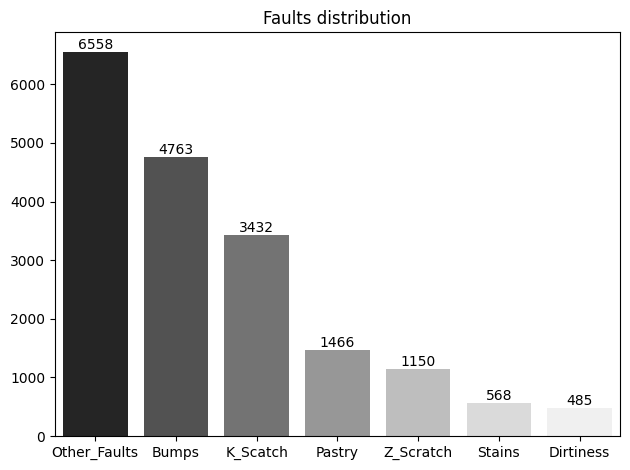

In [5]:
faults = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
sums = df_train[faults].sum().sort_values(ascending=False)

ax = sns.barplot(x=sums.index, y=sums.values, palette="Greys_r")
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Faults distribution")
plt.tight_layout()
plt.show()

<h5>Cross-features correlations</h5>

<h6>Now we know the most common types of faults in the dataset. Let's take a look on what features lead to those faults. Here we can see:
<ul>
<li<b>>X_ Y_ features</b> are highly correlated as they are part of one datalayer - dimension;</li>
<li><b>Pixel areas, Perimeter, Log_, Outside_X_index, Sigmoid and Luminosity</b> are highly correlated as they are part of another datalayer - Luminosity;</li>
<li><b>K_Scratch</b> positively correlated with <b>Luminocity</b> group of features(<b>Pixels_Areas, X_Perimeter, Y_Perimeter, Sum_of_Luminosity</b>) and negatively correlated with <b>X_Maximum and X_Minimum</b>;</li>
<li><b>Bumps</b> and Other faults negatively correlated with <b>Luminosity</b> group feautures;</li>
<li>We can create synthetic values based on cross-correlated features.</li>
</ul>
</h6>


<Figure size 2400x1200 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Matrix')

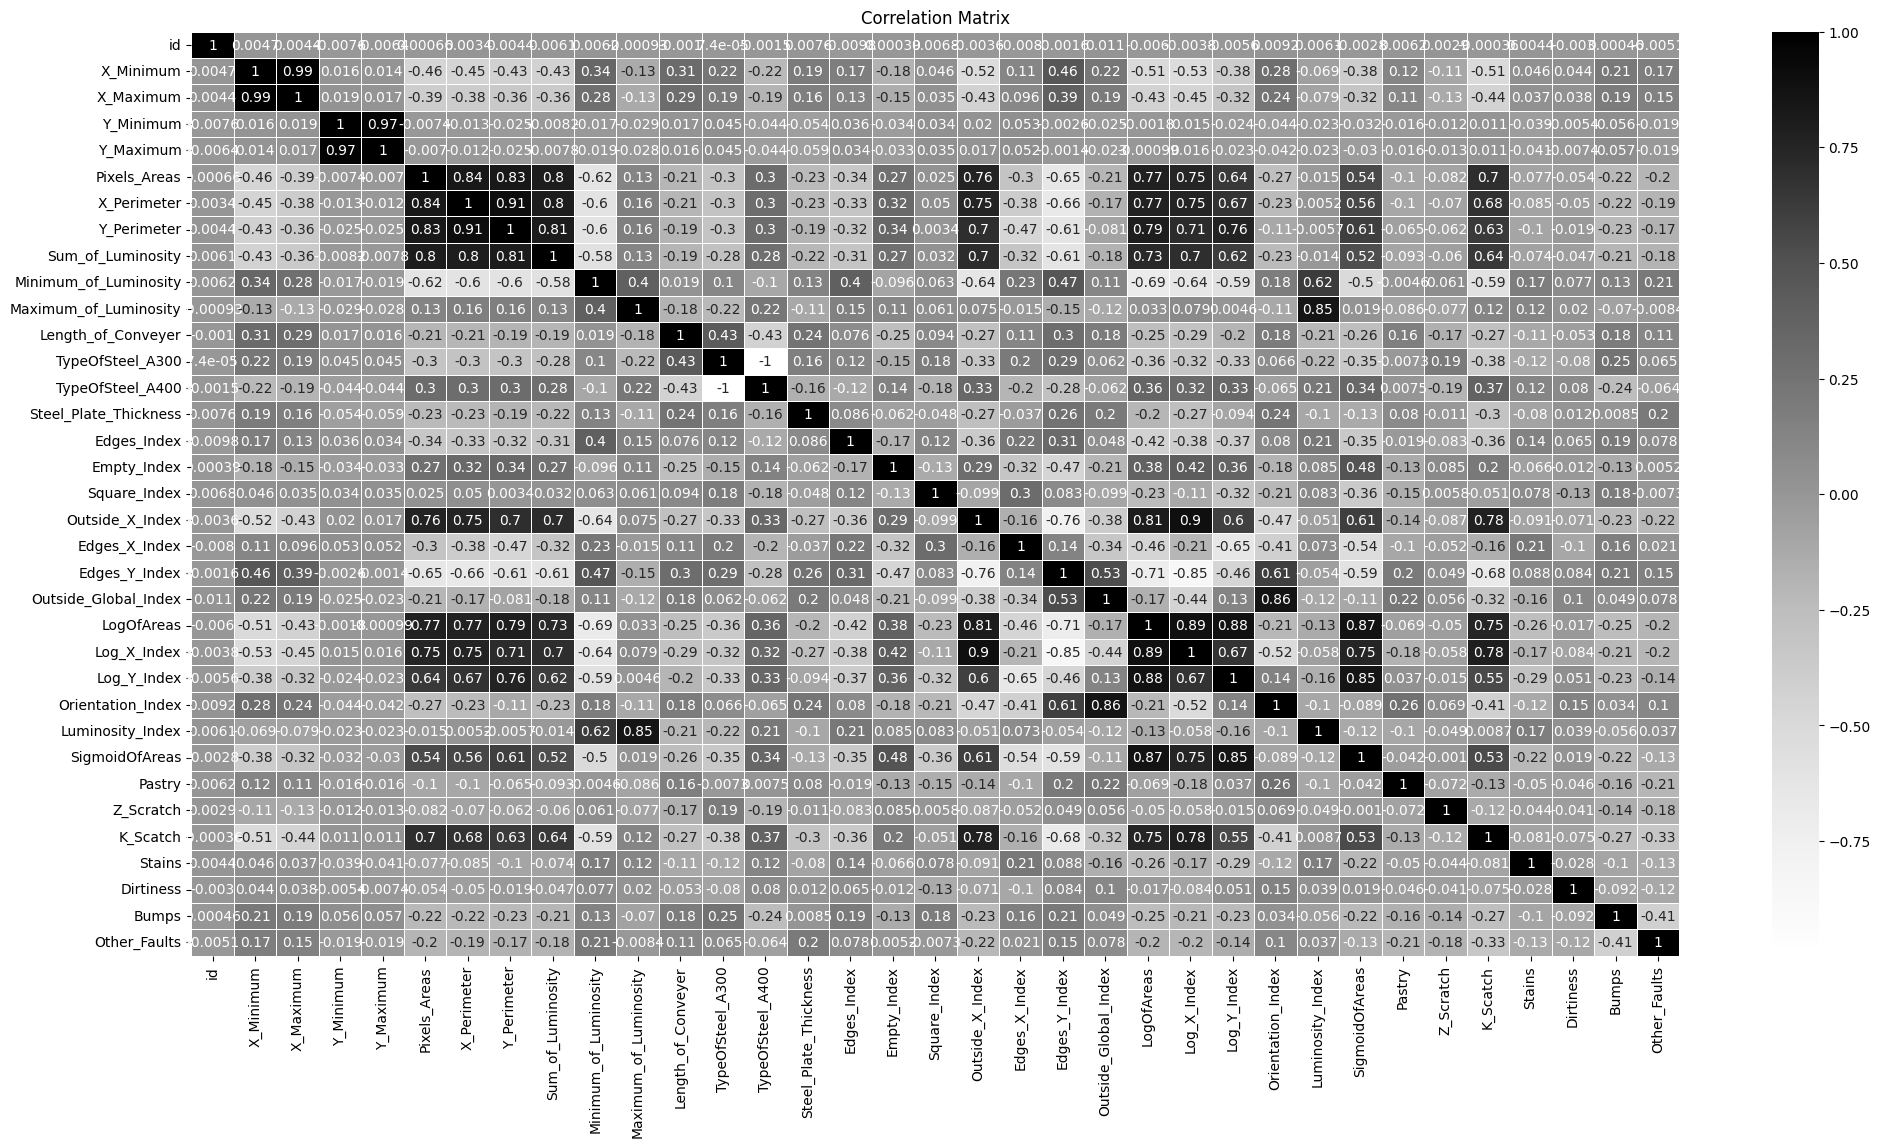

In [6]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(24, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="Greys", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [7]:
lower_threshold = 0.7
upper_threshold = 0.9 # Correlations higher then 0.9 are probably the same thing w/different names;

highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):  # to avoid self-correlations and duplicates;
        correlation_value = correlation_matrix.iloc[i, j]
        if lower_threshold < abs(correlation_value) < upper_threshold:
            highly_correlated_pairs.append(
                (correlation_matrix.columns[i],
                 correlation_matrix.columns[j], 
                 correlation_value)
            )

sorted_pairs = sorted(highly_correlated_pairs, key=lambda x: abs(x[2]), reverse=True)

print("Highly Correlated Feature Pairs (0.7 < |correlation| < 0.9):")
for pair in sorted_pairs:
    print(pair)

Highly Correlated Feature Pairs (0.7 < |correlation| < 0.9):
('Outside_X_Index', 'Log_X_Index', 0.8983409899912759)
('LogOfAreas', 'Log_X_Index', 0.8882390325856594)
('LogOfAreas', 'Log_Y_Index', 0.8792281394891333)
('LogOfAreas', 'SigmoidOfAreas', 0.8724531424401515)
('Outside_Global_Index', 'Orientation_Index', 0.8639872069439484)
('Maximum_of_Luminosity', 'Luminosity_Index', 0.8538555122645558)
('Log_Y_Index', 'SigmoidOfAreas', 0.8524500761700224)
('Edges_Y_Index', 'Log_X_Index', -0.8518128006577472)
('Pixels_Areas', 'X_Perimeter', 0.835078733573749)
('Pixels_Areas', 'Y_Perimeter', 0.8345434453321343)
('Outside_X_Index', 'LogOfAreas', 0.8119602292784268)
('Y_Perimeter', 'Sum_of_Luminosity', 0.8091705936142481)
('X_Perimeter', 'Sum_of_Luminosity', 0.8020724927380157)
('Pixels_Areas', 'Sum_of_Luminosity', 0.7978425105074196)
('Y_Perimeter', 'LogOfAreas', 0.7908629185691817)
('Log_X_Index', 'K_Scatch', 0.782109732284682)
('Outside_X_Index', 'K_Scatch', 0.7788587198690256)
('Pixels_Area

<h5>Skewness</h5>

<h6>The next thing we want to do before start the feature engineering part is to check the data for skewnees. <br>Here we can see:
<ul>
<li><b>Spatial and Luminosity</b> groups of features are notably skewed;</li>
<li><b>Steel plate thickness</b> contains lots of outliers;</li>
</ul>
In the feature engineering part we will reduce skewness with scaling and normalization.
</h6>

<Figure size 1600x1000 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:ylabel='X_Minimum'>

Text(0.5, 1.0, 'X_Minimum')

<AxesSubplot:>

<AxesSubplot:ylabel='X_Maximum'>

Text(0.5, 1.0, 'X_Maximum')

<AxesSubplot:>

<AxesSubplot:ylabel='Y_Minimum'>

Text(0.5, 1.0, 'Y_Minimum')

<AxesSubplot:>

<AxesSubplot:ylabel='Y_Maximum'>

Text(0.5, 1.0, 'Y_Maximum')

<AxesSubplot:>

<AxesSubplot:ylabel='Pixels_Areas'>

Text(0.5, 1.0, 'Pixels_Areas')

<AxesSubplot:>

<AxesSubplot:ylabel='X_Perimeter'>

Text(0.5, 1.0, 'X_Perimeter')

<AxesSubplot:>

<AxesSubplot:ylabel='Y_Perimeter'>

Text(0.5, 1.0, 'Y_Perimeter')

<AxesSubplot:>

<AxesSubplot:ylabel='Sum_of_Luminosity'>

Text(0.5, 1.0, 'Sum_of_Luminosity')

<AxesSubplot:>

<AxesSubplot:ylabel='Minimum_of_Luminosity'>

Text(0.5, 1.0, 'Minimum_of_Luminosity')

<AxesSubplot:>

<AxesSubplot:ylabel='Maximum_of_Luminosity'>

Text(0.5, 1.0, 'Maximum_of_Luminosity')

<AxesSubplot:>

<AxesSubplot:ylabel='Length_of_Conveyer'>

Text(0.5, 1.0, 'Length_of_Conveyer')

<AxesSubplot:>

<AxesSubplot:ylabel='TypeOfSteel_A300'>

Text(0.5, 1.0, 'TypeOfSteel_A300')

<AxesSubplot:>

<AxesSubplot:ylabel='TypeOfSteel_A400'>

Text(0.5, 1.0, 'TypeOfSteel_A400')

<AxesSubplot:>

<AxesSubplot:ylabel='Steel_Plate_Thickness'>

Text(0.5, 1.0, 'Steel_Plate_Thickness')

<AxesSubplot:>

<AxesSubplot:ylabel='Edges_Index'>

Text(0.5, 1.0, 'Edges_Index')

<AxesSubplot:>

<AxesSubplot:ylabel='Empty_Index'>

Text(0.5, 1.0, 'Empty_Index')

<AxesSubplot:>

<AxesSubplot:ylabel='Square_Index'>

Text(0.5, 1.0, 'Square_Index')

<AxesSubplot:>

<AxesSubplot:ylabel='Outside_X_Index'>

Text(0.5, 1.0, 'Outside_X_Index')

<AxesSubplot:>

<AxesSubplot:ylabel='Edges_X_Index'>

Text(0.5, 1.0, 'Edges_X_Index')

<AxesSubplot:>

<AxesSubplot:ylabel='Edges_Y_Index'>

Text(0.5, 1.0, 'Edges_Y_Index')

<AxesSubplot:>

<AxesSubplot:ylabel='Outside_Global_Index'>

Text(0.5, 1.0, 'Outside_Global_Index')

<AxesSubplot:>

<AxesSubplot:ylabel='LogOfAreas'>

Text(0.5, 1.0, 'LogOfAreas')

<AxesSubplot:>

<AxesSubplot:ylabel='Log_X_Index'>

Text(0.5, 1.0, 'Log_X_Index')

<AxesSubplot:>

<AxesSubplot:ylabel='Log_Y_Index'>

Text(0.5, 1.0, 'Log_Y_Index')

<AxesSubplot:>

<AxesSubplot:ylabel='Orientation_Index'>

Text(0.5, 1.0, 'Orientation_Index')

<AxesSubplot:>

<AxesSubplot:ylabel='Luminosity_Index'>

Text(0.5, 1.0, 'Luminosity_Index')

<AxesSubplot:>

<AxesSubplot:ylabel='SigmoidOfAreas'>

Text(0.5, 1.0, 'SigmoidOfAreas')

<AxesSubplot:>

<AxesSubplot:ylabel='Pastry'>

Text(0.5, 1.0, 'Pastry')

<AxesSubplot:>

<AxesSubplot:ylabel='Z_Scratch'>

Text(0.5, 1.0, 'Z_Scratch')

<AxesSubplot:>

<AxesSubplot:ylabel='K_Scatch'>

Text(0.5, 1.0, 'K_Scatch')

<AxesSubplot:>

<AxesSubplot:ylabel='Stains'>

Text(0.5, 1.0, 'Stains')

<AxesSubplot:>

<AxesSubplot:ylabel='Dirtiness'>

Text(0.5, 1.0, 'Dirtiness')

<AxesSubplot:>

<AxesSubplot:ylabel='Bumps'>

Text(0.5, 1.0, 'Bumps')

<AxesSubplot:>

<AxesSubplot:ylabel='Other_Faults'>

Text(0.5, 1.0, 'Other_Faults')

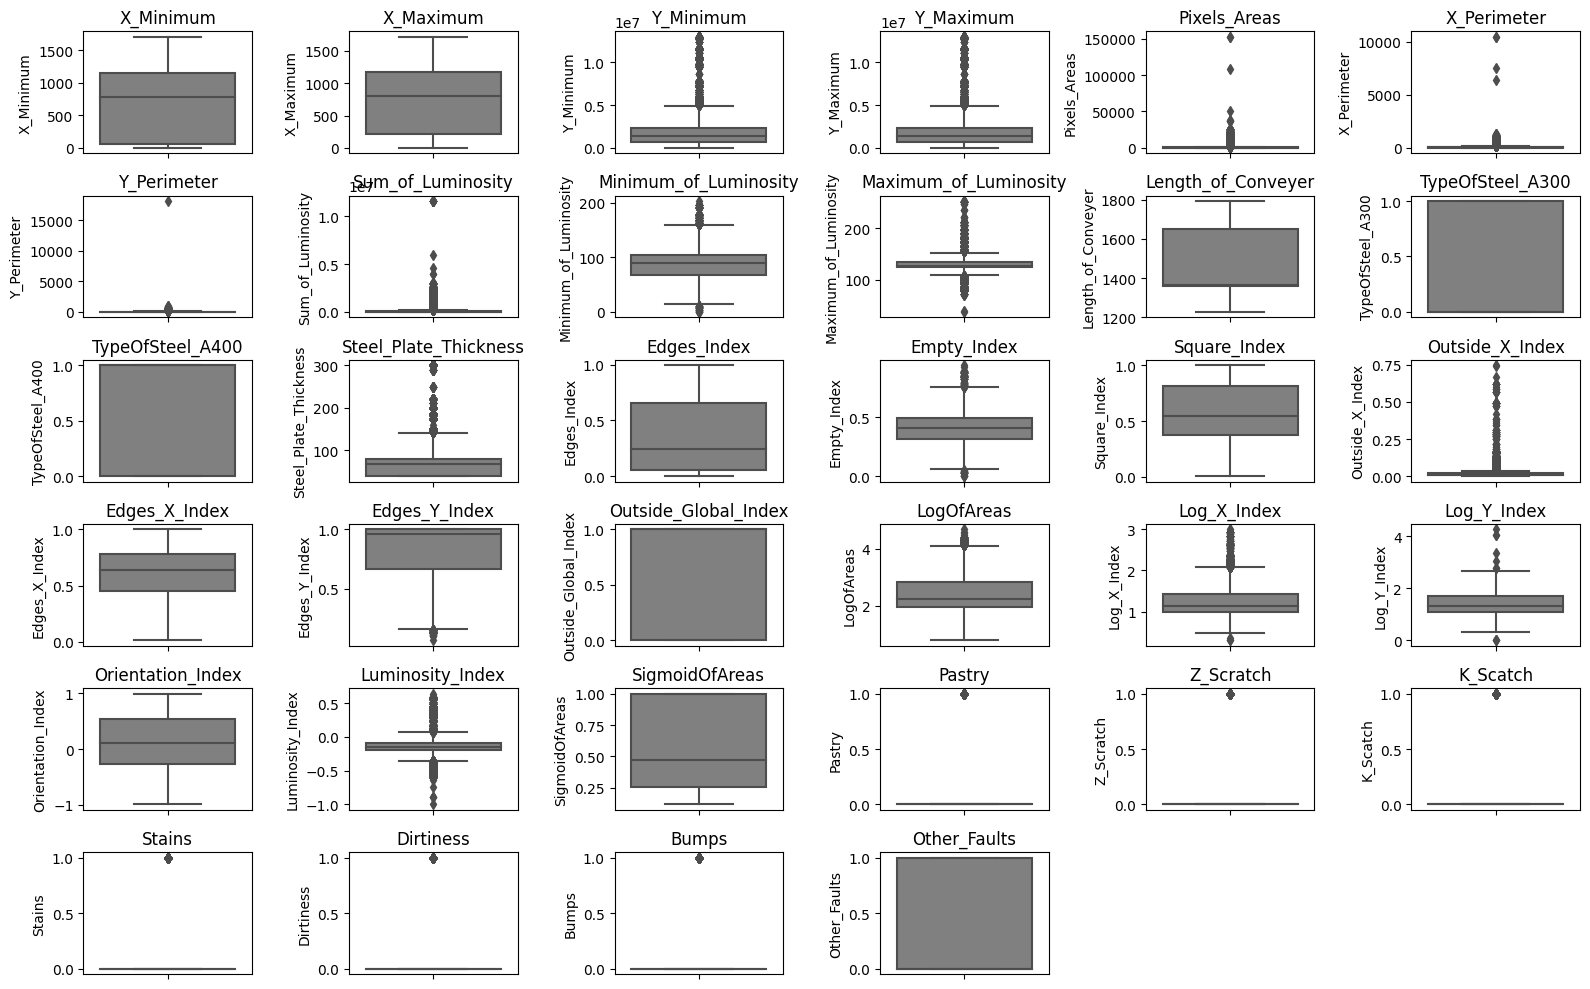

In [8]:
plt.figure(figsize=(16, 10))

for i, column in enumerate(df, start=1):
    plt.subplot(6, 6, i)
    sns.boxplot(y=df[column], color="grey")
    plt.title(column)

plt.tight_layout()
plt.show()

In [9]:
print(f"The data skewness:\n{df.skew().sort_values(ascending=False)}")

The data skewness:
Y_Perimeter              64.730920
X_Perimeter              13.859640
Sum_of_Luminosity         7.807619
Pixels_Areas              7.228001
Dirtiness                 6.054619
Stains                    5.556216
Z_Scratch                 3.711869
Outside_X_Index           3.333037
Pastry                    3.192803
Y_Minimum                 2.570073
Y_Maximum                 2.565807
Steel_Plate_Thickness     2.372863
K_Scatch                  1.678623
Maximum_of_Luminosity     1.249437
Bumps                     1.168228
Log_X_Index               1.103902
LogOfAreas                0.855029
Length_of_Conveyer        0.851547
Luminosity_Index          0.719731
Other_Faults              0.669819
Edges_Index               0.538535
Log_Y_Index               0.401086
TypeOfSteel_A300          0.392663
SigmoidOfAreas            0.220912
Empty_Index               0.209892
X_Maximum                 0.066269
Square_Index              0.018202
X_Minimum                 0.012553
O

<Figure size 3200x2100 with 0 Axes>

array([[<AxesSubplot:title={'center':'X_Minimum'}>,
        <AxesSubplot:title={'center':'X_Maximum'}>,
        <AxesSubplot:title={'center':'Y_Minimum'}>,
        <AxesSubplot:title={'center':'Y_Maximum'}>,
        <AxesSubplot:title={'center':'Pixels_Areas'}>,
        <AxesSubplot:title={'center':'X_Perimeter'}>],
       [<AxesSubplot:title={'center':'Y_Perimeter'}>,
        <AxesSubplot:title={'center':'Sum_of_Luminosity'}>,
        <AxesSubplot:title={'center':'Minimum_of_Luminosity'}>,
        <AxesSubplot:title={'center':'Maximum_of_Luminosity'}>,
        <AxesSubplot:title={'center':'Length_of_Conveyer'}>,
        <AxesSubplot:title={'center':'TypeOfSteel_A300'}>],
       [<AxesSubplot:title={'center':'TypeOfSteel_A400'}>,
        <AxesSubplot:title={'center':'Steel_Plate_Thickness'}>,
        <AxesSubplot:title={'center':'Edges_Index'}>,
        <AxesSubplot:title={'center':'Empty_Index'}>,
        <AxesSubplot:title={'center':'Square_Index'}>,
        <AxesSubplot:title={'cent

Text(0.5, 0.98, 'Histogram of Features')

<Figure size 3200x2100 with 0 Axes>

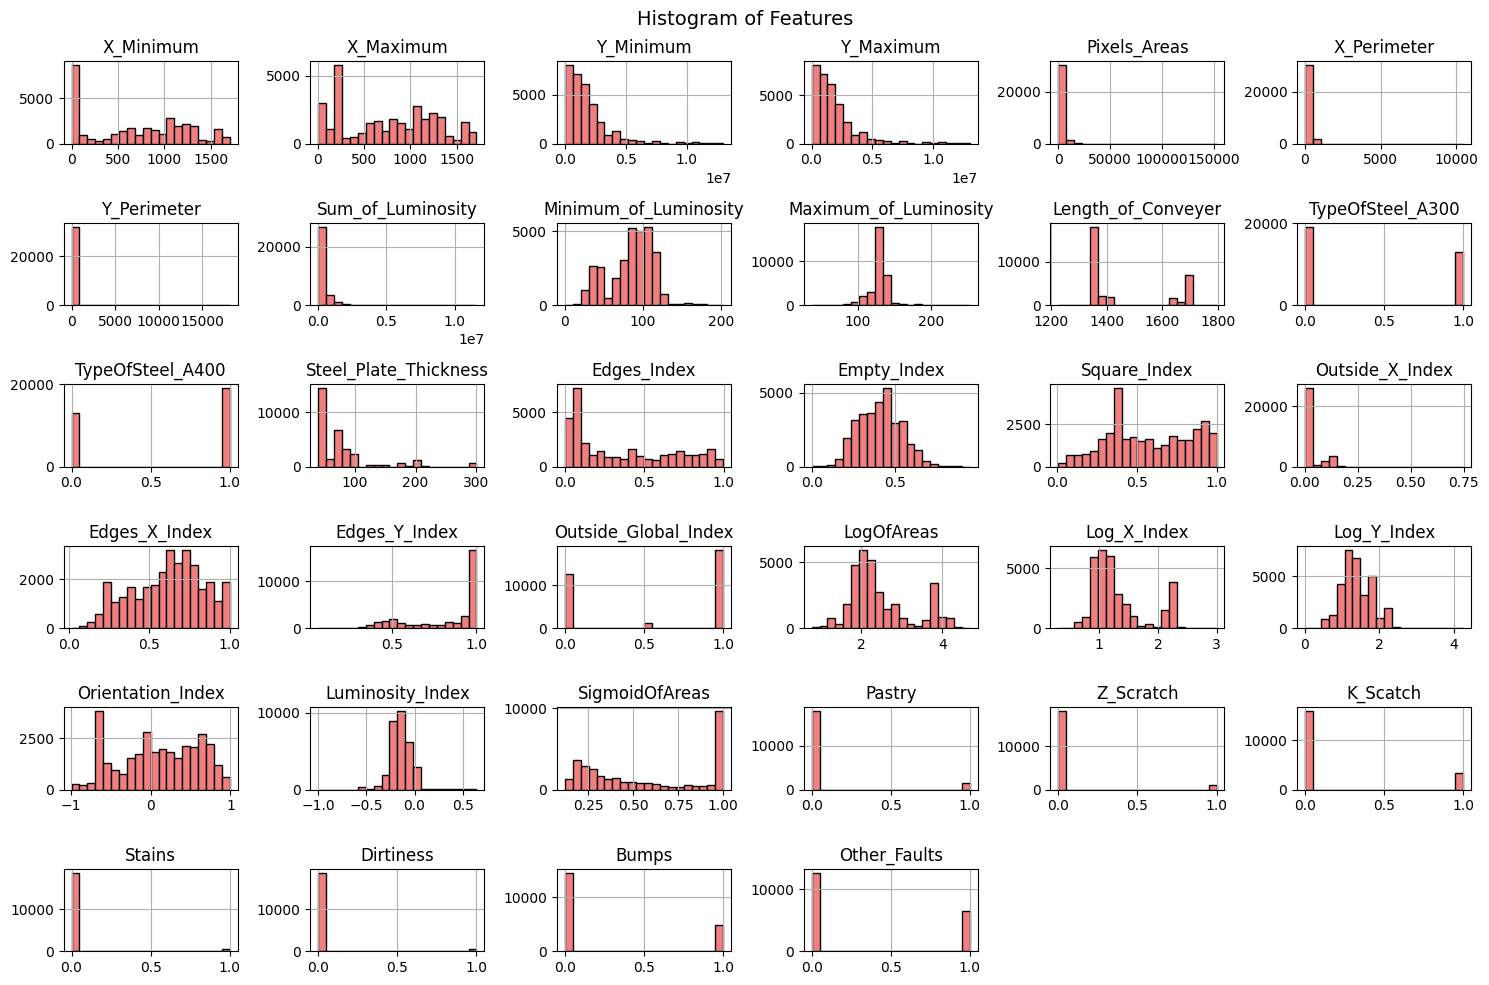

In [10]:
plt.figure(figsize=(32, 21), facecolor="lightgrey")
df.hist(bins=20, figsize=(15, 10), color="lightcoral", edgecolor="black", grid=True)
plt.suptitle("Histogram of Features", fontsize=14)
plt.tight_layout()
plt.show()

<h5>Feature Engineering</h5>
<h6>
Plan:
<br>
<ul>
<li>Create new features based on expertise and cross-correlations;</li>
<li>Normalize values;</li>
<li>Scale the data.</li>
</ul>
</h6>

In [11]:
class FeatureEngineering:
    # A class to perform feature engineering on the input data.
    def fit(self, X, y=None):
        return self
    
    def fit_transform(self, X):
        epsilon = 1e-6

        # Location Features
        X["X_Distance"] = X["X_Maximum"] - X["X_Minimum"]
        X["Y_Distance"] = X["Y_Maximum"] - X["Y_Minimum"]

        # Density Feature
        X["Density"] = X["Pixels_Areas"] / (X["X_Perimeter"] + X["Y_Perimeter"])

        # Relative Perimeter Feature
        X["Relative_Perimeter"] = X["X_Perimeter"] / (X["X_Perimeter"] + X["Y_Perimeter"] + epsilon)

        # Circularity Feature
        X["Circularity"] = X["Pixels_Areas"] / (X["X_Perimeter"] ** 2)

        # Color Contrast Feature
        X["Color_Contrast"] = X["Maximum_of_Luminosity"] - X["Minimum_of_Luminosity"]

        # Combined Geometric Index Feature
        X["Combined_Geometric_Index"] = X["Edges_Index"] * X["Square_Index"]

        # Interaction Term Feature
        X["X_Distance*Pixels_Areas"] = X["X_Distance"] * X["Pixels_Areas"]

        # Additional Features
        X["Sine_Orientation"] = np.sin(X["Orientation_Index"])
        X["Edges_Index2"] = np.exp(X["Edges_Index"] + epsilon)
        X["Aspect_Ratio_Pixels"] = np.where(X["Y_Perimeter"] == 0, 0, X["X_Perimeter"] / X["Y_Perimeter"])
        X["Aspect_Ratio"] = np.where(X["Y_Distance"] == 0, 0, X["X_Distance"] / X["Y_Distance"])

        # Average Luminosity Feature
        X["Average_Luminosity"] = (X["Sum_of_Luminosity"] + X["Minimum_of_Luminosity"]) / 2

        # Normalized Steel Thickness Feature
        X["Normalized_Steel_Thickness"] = (X["Steel_Plate_Thickness"] - X["Steel_Plate_Thickness"].min()) / (X["Steel_Plate_Thickness"].max() - X["Steel_Plate_Thickness"].min())

        # Logarithmic Features
        X["Log_Perimeter"] = np.log(X["X_Perimeter"] + X["Y_Perimeter"] + epsilon)
        X["Log_Luminosity"] = np.log(X["Sum_of_Luminosity"] + epsilon)
        X["Log_Aspect_Ratio"] = np.log(X["Aspect_Ratio"] ** 2 + epsilon)

        # Statistical Features
        X["Combined_Index"] = X["Orientation_Index"] * X["Luminosity_Index"]
        X["Sigmoid_Areas"] = 1 / (1 + np.exp(-X["LogOfAreas"] + epsilon))

        return pd.DataFrame(X)

df = FeatureEngineering().fit_transform(df_train)
df_train = FeatureEngineering().fit_transform(df_train)
df_test = FeatureEngineering().fit_transform(df_test)
print(df_train.columns, df_test.columns,  df.columns)
print(df_train.shape, df_test.shape,  df.shape)
df.head()

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults', 'X_Distance', 'Y_Distance',
       'Density', 'Relative_Perimeter', 'Circularity', 'Color_Contrast',
       'Combined_Geometric_Index', 'X_Distance*Pixels_Areas',
       'Sine_Orientation', 'Edges_Index2', 'Aspect_Ratio_Pixels',
       'Aspect_Ratio', 'Average_Luminosity', 'Normalized_Steel_Thickness',
       'Log_Perimeter', 'Log_Luminosity', 'Log_Aspect_Ratio', 

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,X_Distance,Y_Distance,Density,Relative_Perimeter,Circularity,Color_Contrast,Combined_Geometric_Index,X_Distance*Pixels_Areas,Sine_Orientation,Edges_Index2,Aspect_Ratio_Pixels,Aspect_Ratio,Average_Luminosity,Normalized_Steel_Thickness,Log_Perimeter,Log_Luminosity,Log_Aspect_Ratio,Combined_Index,Sigmoid_Areas
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0,6,5,1.230769,0.615385,0.250000,27,0.369650,96,-0.479426,2.094471,1.600000,1.200000,1193.5,0.038462,2.564949,7.729296,0.364644,0.005200,0.769253
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1,8,22,5.851351,0.270270,1.082500,41,0.200595,3464,0.675690,2.175375,0.370370,0.363636,22274.0,0.153846,4.304065,10.702750,-2.023194,-0.222347,0.933174
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0,153,68,10.122667,0.626667,0.022912,112,0.055115,1742364,-0.010500,1.057282,1.678571,2.250000,655710.0,0.000000,7.025538,14.086599,1.621861,0.000991,0.982983
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0,8,27,4.666667,0.355556,0.820312,20,0.240043,1680,0.618396,2.054846,0.551724,0.296296,1658.0,0.000000,3.806663,8.071531,-2.432779,-0.026801,0.910699
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1,20,45,3.748201,0.517986,0.100502,29,0.010197,10420,0.793050,1.128739,1.074627,0.444444,24156.5,1.000000,4.934474,10.783757,-1.621855,-0.224829,0.941000


<h5>Normalization</h5>

In [12]:
normalized_columns = [col for col in df.columns if col not in ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]]
normalized_df = (df[normalized_columns] ** 2)

normalized_data = pd.DataFrame()
for column in normalized_df.columns:
    normalized_column = None
    if column in normalized_df:
        normalized_column, _ = boxcox(normalized_df[column] + 1)
    else:
        normalized_column = normalized_df[column]
    normalized_data[column] = normalized_column

normalized_data

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,X_Distance,Y_Distance,Density,Relative_Perimeter,Circularity,Color_Contrast,Combined_Geometric_Index,X_Distance*Pixels_Areas,Sine_Orientation,Edges_Index2,Aspect_Ratio_Pixels,Aspect_Ratio,Average_Luminosity,Normalized_Steel_Thickness,Log_Perimeter,Log_Luminosity,Log_Aspect_Ratio,Combined_Index,Sigmoid_Areas
0,0.000000,83.962559,144.094894,262.384986,263.196420,4.073047,2.831551,2.631787,7.039043,563.215385,17.863213,0.181579,0.000000,1.326406,1.909485,0.221426,0.118410,0.198167,0.000035,0.640049,4.161757,0.000000,0.751352,0.408242,0.379385,0.185204,0.000108,0.019615,2.467321,2.694425,0.818232,0.301966,0.053241,4.188661,7.571644e-02,6.284999,0.179636,0.706449,0.892254,0.637578,6.638850,0.001460,1.400208,1.257285,1.217929e-01,2.701036e-05,0.857164
1,0.785459,98.781507,175.297742,247.245370,247.996349,6.456305,3.494175,4.867469,7.707085,310.448923,16.522062,0.181579,0.404387,0.000000,1.922805,0.228673,0.070339,0.062284,0.000019,0.060198,4.161757,1.176085,1.402458,0.348888,1.178966,0.307602,0.039530,0.429232,2.701030,4.359239,2.306117,0.069547,0.220606,4.480799,3.315879e-02,8.678905,0.292417,0.713860,0.123771,0.118218,7.345061,0.019397,1.759336,1.279690,1.198767e+00,1.221588e-02,1.462690
2,2.168057,19.956903,72.508098,332.284328,333.396740,7.546259,4.641481,5.929124,8.064358,103.171813,17.905430,0.181579,0.000000,1.326406,1.900524,0.003081,0.170897,0.482098,0.003171,0.053992,0.188377,0.000000,1.693026,0.666027,1.442524,0.000110,0.008087,0.449862,3.966114,5.296175,2.671032,0.310878,0.000524,5.050867,2.991699e-03,10.496565,0.000110,0.488395,0.924495,0.954147,7.718758,0.000000,2.007867,1.291759,1.008962e+00,9.824383e-07,1.701926
3,3.555550,97.120087,171.774754,370.976001,372.259260,6.079038,3.353678,4.410294,7.142247,569.415079,17.604851,0.181579,0.000000,1.326406,1.900524,0.217446,0.089566,0.099539,0.000019,0.129579,3.053139,1.176085,1.304015,0.348888,0.977766,0.272284,0.001587,0.135887,2.701030,4.548558,2.126004,0.116341,0.204290,3.955282,4.391285e-02,8.308780,0.260394,0.702534,0.245870,0.081379,6.746229,0.000000,1.683336,1.260922,1.349790e+00,6.977822e-04,1.364006
4,4.872877,136.020800,258.819843,236.666655,237.377501,6.542869,4.099286,5.008932,7.719447,378.027068,16.522062,0.181579,0.000000,1.326406,1.938733,0.014188,0.173347,0.007038,0.000349,0.043138,3.911623,1.176085,1.439143,0.569713,1.267694,0.376918,0.033514,0.449783,3.281079,4.982386,1.934532,0.227070,0.009832,4.241243,1.039166e-04,9.159420,0.353587,0.515253,0.616768,0.167863,7.358209,0.060424,1.837210,1.280092,1.008959e+00,1.223707e-02,1.498365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,3019.602997,95.111729,167.534984,159.568042,159.983259,4.135416,2.163511,2.351014,7.027602,619.474262,17.863213,0.181579,0.000000,0.000000,1.909485,0.246327,0.021485,0.414544,0.000019,0.640049,1.669737,0.000000,0.769269,0.348888,0.298105,0.019866,0.000019,0.076546,2.701030,3.418671,1.373712,0.213770,0.219909,3.868329,1.085056e-01,6.588771,0.019799,0.734023,0.568405,0.465444,6.628389,0.001460,1.228378,1.256876,5.343059e-02,3.953328e-07,0.871038
19215,3019.714219,93.446756,164.577594,342.818150,343.974835,6.132483,3.393072,4.321762,7.626252,508.018982,17.560918,0.181579,0.404387,0.000000,1.919650,0.249739,0.086179,0.071419,0.000042,0.409430,2.925780,1.176085,1.318025,0.464089,0.965945,0.298646,0.008794,0.215005,2.986372,3.742521,2.240186,0.141216,0.202034,4.241243,4.845643e-02,8.569876,0.284342,0.738407,0.320894,0.532014,7.259370,0.011878,1.6

In [13]:
scaler = MinMaxScaler()
normalized_data_scaled = scaler.fit_transform(normalized_data)
normalized_data_scaled = pd.DataFrame(normalized_data_scaled, columns=normalized_data.columns)
target_columns = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]

normalized_data_scaled[target_columns] = df[target_columns]
df[normalized_columns] = normalized_data_scaled[normalized_columns]

In [14]:
print(f"The data skewness:\n{normalized_data_scaled.skew().sort_values(ascending=False)}")

The data skewness:
Dirtiness                     6.054619
Stains                        5.556216
Z_Scratch                     3.711869
Pastry                        3.192803
K_Scatch                      1.678623
Outside_X_Index               1.597301
Normalized_Steel_Thickness    1.355703
Bumps                         1.168228
Combined_Geometric_Index      0.747706
Other_Faults                  0.669819
Combined_Index                0.666563
Circularity                   0.615328
Aspect_Ratio                  0.467106
Edges_Index                   0.453424
TypeOfSteel_A300              0.396925
Luminosity_Index              0.363425
Edges_Index2                  0.303226
Steel_Plate_Thickness         0.233711
SigmoidOfAreas                0.219605
Log_X_Index                   0.193654
Log_Aspect_Ratio              0.181271
X_Perimeter                   0.154508
Orientation_Index             0.132849
Square_Index                  0.108031
Sine_Orientation              0.092790
Averag

<h5>Modeling</h5>
<h6>
Plan:<br><br>
<li>Split the train and test datasets again;</li>
<li>Setup the RandomSearch;</li>
<li>Random Foresting;</li>
<li>Gradient Boosting;</li>
<li>Check for results and upload.</li>
</h6>


<h5>Splitting the dataset</h5>

In [15]:
print(f"Train data: {df_train.shape} \nTest data: {df_test.shape}, \nSubmission data: {df_submission.shape}")

X = df_train.drop(["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"], axis=1)
y = df_train[["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
df_test

Train data: (19219, 54) 
Test data: (12814, 47), 
Submission data: (12814, 8)


,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,X_Distance,Y_Distance,Density,Relative_Perimeter,Circularity,Color_Contrast,Combined_Geometric_Index,X_Distance*Pixels_Areas,Sine_Orientation,Edges_Index2,Aspect_Ratio_Pixels,Aspect_Ratio,Average_Luminosity,Normalized_Steel_Thickness,Log_Perimeter,Log_Luminosity,Log_Aspect_Ratio,Combined_Index,Sigmoid_Areas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,127,1656,0,1,150,0.3877,0.4896,0.3273,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172,18,24,9.550725,0.333333,1.245747,60,0.126894,11862,0.623100,1.473589,0.500000,0.750000,31212.0,0.423077,4.234107,11.040631,-0.575362,-0.152097,0.944852
1,19220,1257,1271,419960,419973,370,26,28,39293,92,132,1354,0,1,40,0.1629,0.4136,0.0938,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104,14,13,6.851852,0.481481,0.547337,40,0.015280,5180,0.787227,1.176920,0.928571,1.076923,19692.5,0.000000,3.988984,10.578802,0.148217,-0.131685,0.928787
2,19221,1358,1372,117715,117724,289,36,32,29386,101,134,1360,0,1,40,0.0609,0.6234,0.4762,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514,14,9,4.250000,0.529412,0.222994,33,0.029001,4046,-0.500174,1.062794,1.125000,1.555556,14743.5,0.000000,4.219508,10.288274,0.883666,0.022785,0.921355
3,19222,158,168,232415,232440,80,10,11,8586,107,140,1690,1,0,100,0.4439,0.3333,0.8182,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051,10,25,3.809524,0.476190,0.800000,33,0.363199,800,0.180800,1.558776,0.909091,0.400000,4346.5,0.230769,3.044522,9.057888,-1.832575,-0.013417,0.870242
4,19223,559,592,544375,544389,140,19,15,15524,103,134,1688,1,0,60,0.8191,0.2619,0.4286,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170,33,14,4.117647,0.558824,0.387812,31,0.351066,4620,-0.540810,2.268460,1.266667,2.357143,7813.5,0.076923,3.526361,9.650142,1.714901,0.051083,0.895304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12809,32028,1101,1116,447943,447992,313,32,37,21603,79,103,1353,0,1,70,0.2853,0.3050,0.2339,0.0126,0.4063,0.9194,1.0,2.4955,1.2305,1.6335,0.7661,-0.3109,0.8894,15,49,4.536232,0.463768,0.305664,24,0.066732,4695,0.693330,1.330162,0.864865,0.306122,10841.0,0.115385,4.234107,9.980587,-2.367530,-0.238180,0.923826
12810,32029,1289,1306,3149494,3149542,59,9,18,5249,113,141,1362,0,1,40,0.0106,0.2778,0.2778,0.0052,0.7778,1.0000,1.0,1.7708,0.8451,1.2553,0.7222,-0.0448,0.1954,17,48,2.185185,0.333333,0.728395,28,0.002945,1003,0.661037,1.010657,0.500000,0.354167,2681.0,0.000000,3.295837,8.565793,-2.075967,-0.032355,0.854557
12811,32030,41,210,1587535,1587191,16584,796,522,1858162,24,143,1400,0,1,40,0.0557,0.5644,0.9371,0.1236,0.2199,0.4097,0.0,4.2525,2.2504,2.2672,-0.0629,-0.0801,1.0000,169,-344,12.582701,0.603945,0.026174,119,0.052196,2802696,-0.062859,1.057282,1.524904,-0.491279,929093.0,0.000000,7.183871,14.435098,-1.421482,0.005038,0.985971
12812,32031,1329,1340,702237,702267,386,43,34,36875,66,124,1364,0,1,40,0.0133,0.1814,0.1539,0.0095,0.2407,1.0000,1.0,2.5866,1.1139,1.5911,0.8461,-0.2629,0.7844,11,30,5.012987,0.558442,0.208761,58,0.002047,4246,0.748701,1.013390,1.264706,0.366667,18470.5,0.000000,4.343805,10.515289,-2.006597,-0.222440,0.929994


<h5>Model Evaluation and Model Selection</h5>

RandomForestClassifier()

Random Forest - ROC AUC: 0.8734360645492733 - Accuracy: 0.35650364203954216


DecisionTreeClassifier()

Decision Tree - ROC AUC: 0.6671628339789473 - Accuracy: 0.44557752341311135


<Figure size 1200x800 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 0, 'ROC AUC Scores')

Text(0, 0.5, 'Model')

Text(0.5, 1.0, 'ROC AUC Scores for Classification Models')

(0.0, 1.0)

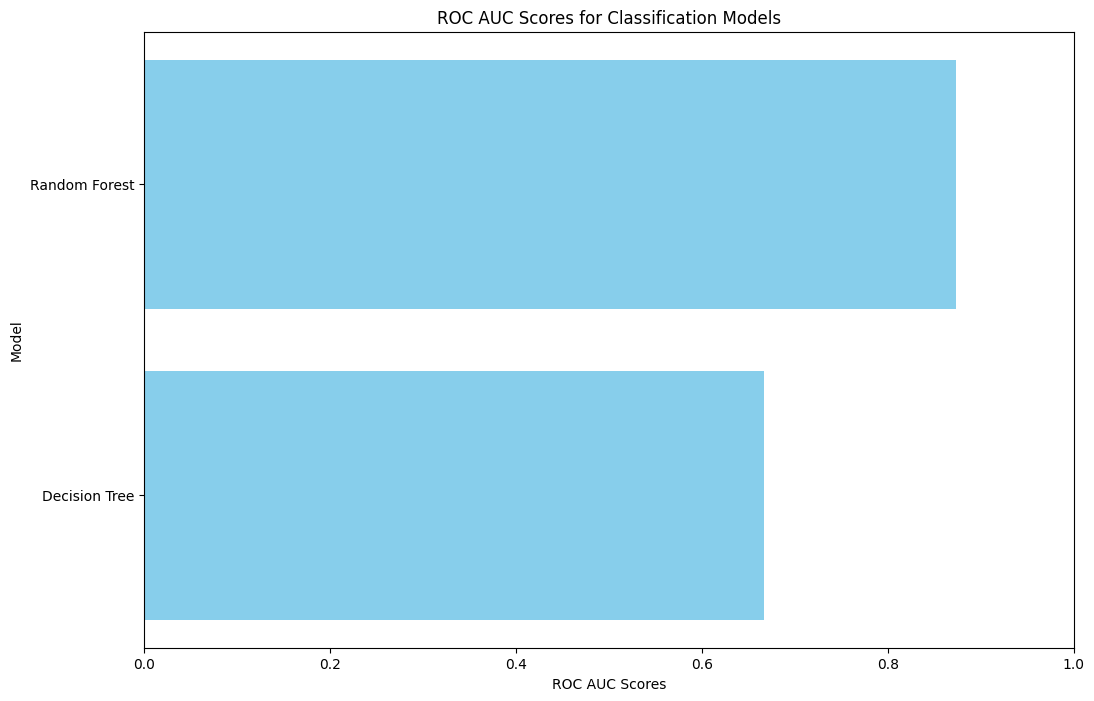

<Figure size 1200x800 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 0, 'Accuracy Scores')

Text(0, 0.5, 'Model')

Text(0.5, 1.0, 'Accuracy Scores for Classification Models')

(0.0, 1.0)

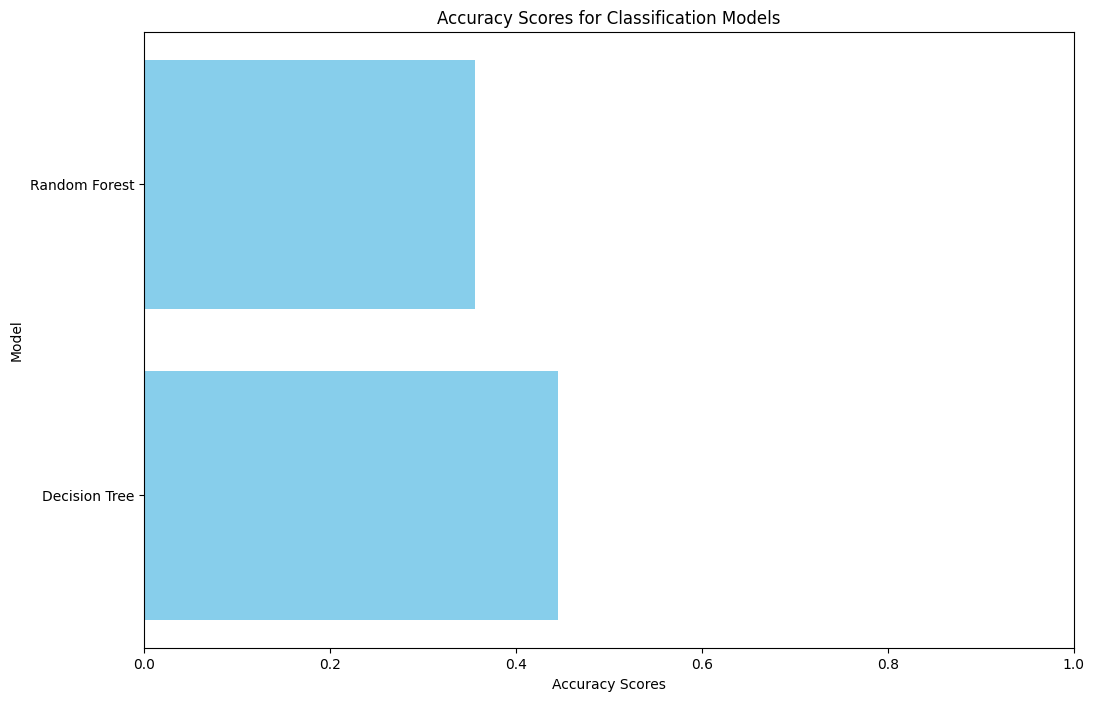

In [16]:
# Model Selection of Classifier Models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Dictionary to store cross-validation scores for each model
accuracy_scores = {}
roc_auc_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_predictions = model.predict(X_test)    
    y_pred_prob = np.array(model.predict_proba(X_test))
    y_pred_prob = y_pred_prob[:, :, 1].T
    accuracy = accuracy_score(y_test, y_predictions)
    accuracy_scores[name] = accuracy
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    roc_auc_scores[name] = np.mean(roc_auc)
    print(f"{name} - ROC AUC: {roc_auc} - Accuracy: {accuracy}")

# Plotting the ROC AUC scores
plt.figure(figsize=(12, 8))
plt.barh(list(roc_auc_scores.keys()), list(roc_auc_scores.values()), color="skyblue")
plt.xlabel("ROC AUC Scores")
plt.ylabel("Model")
plt.title("ROC AUC Scores for Classification Models")
plt.xlim(0, 1)  # Set x-axis limit to better visualize ROC AUC scores
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score at the top
plt.show()

# Plotting the Accuracy scores
plt.figure(figsize=(12, 8))
plt.barh(list(accuracy_scores.keys()), list(accuracy_scores.values()), color="skyblue")
plt.xlabel("Accuracy Scores")
plt.ylabel("Model")
plt.title("Accuracy Scores for Classification Models")
plt.xlim(0, 1)  # Set x-axis limit to better visualize ROC AUC scores
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score at the top
plt.show()

<h5>Hyperparameters Tuning</h5>

In [17]:
def hyperparameters_search_random(classifier, parameters, cv, X_train, X_test, y_train):
    rs = RandomizedSearchCV(classifier, parameters, cv=cv, scoring="roc_auc", verbose=0, n_jobs=-1, random_state=82)
    
    start = time.perf_counter()
    rs = rs.fit(X_train, y_train)
    end = time.perf_counter()

    print(f"roc_auc_train: {rs.best_score_} using {rs.best_params_} in {end - start} seconds")
    
    best_model = rs.best_estimator_
    y_prob = best_model.predict_proba(X_test)
    y_prob_train = best_model.predict(X_train)

    return best_model

classifier = RandomForestClassifier()
parameters = {'criterion': ['entropy', 'gini'],
              'n_estimators': [50, 100, 150],
              'max_depth': range(2, 20, 2),
              'min_samples_leaf': [50, 100, 150, 200]
            }

best_rf = hyperparameters_search_random(classifier, parameters, cv=10, X_train=X_train, X_test=X_test, y_train=y_train)
print(best_rf)

roc_auc_train: 0.8805836640487021 using {'n_estimators': 100, 'min_samples_leaf': 50, 'max_depth': 12, 'criterion': 'entropy'} in 92.65488253300009 seconds
RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_leaf=50)


#### Model Building and Training

In [18]:
parameters = {"n_estimators": 50, "min_samples_leaf": 100, "max_depth": 14, "criterion": "entropy"}

# Create a pipeline with preprocessing and RandomForestClassifier
pipeline = Pipeline(steps=[("scaler", MinMaxScaler()), ("pca", PCA(n_components=0.95)), ("classifier", RandomForestClassifier(**parameters))])

pipeline.fit(X_train, y_train)

y_predictions = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=14,
                                        min_samples_leaf=100,
                                        n_estimators=50))])

In [23]:
accuracy = accuracy_score(y_test, y_predictions)
classification_rep = classification_report(y_test, y_predictions, zero_division=1)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.26368366285119665
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       386
           1       1.00      0.00      0.00       275
           2       0.91      0.88      0.89       852
           3       0.67      0.62      0.65       130
           4       1.00      0.00      0.00       107
           5       0.65      0.18      0.28      1167
           6       0.69      0.03      0.05      1672

   micro avg       0.81      0.24      0.37      4589
   macro avg       0.84      0.24      0.27      4589
weighted avg       0.77      0.24      0.27      4589
 samples avg       0.95      0.27      0.26      4589



#### Submission

In [19]:
final_pred = pipeline.predict(df_test)
X_test_prediction = pd.DataFrame(final_pred, columns=y.keys())
submission = pd.concat([test_ids, X_test_prediction], axis=1)
submission.to_csv("../my_submission.csv", index=False)
submission

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0,0,0,0,0,0,0
1,19220,0,0,0,0,0,0,0
2,19221,0,0,0,0,0,0,0
3,19222,0,0,0,0,0,0,0
4,19223,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
12809,32028,0,0,0,0,0,0,0
12810,32029,0,0,0,0,0,0,0
12811,32030,0,0,1,0,0,0,0
12812,32031,0,0,0,0,0,0,0
